In [2]:
import numpy as np
import scipy.linalg as la
from scipy import sparse
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
import cvxpy as cvx
from qutip import *

This is a quick and inefficient MaxCut prototype using QuTiP

In [12]:
# Number of qubits
N= 4

In [55]:
# Define Operators 
def gen_cij(edge):
    i,j = edge
    Id = [qeye(2) for n in range(N)]
    si_n = tensor(Id)
    Id[i] = sigmaz()
    Id[j] = sigmaz()
    zij = tensor(Id)
    return 0.5*(si_n - zij)

def gen_B():
    b_op = 0*tensor([qeye(2) for j in range(N)])
    for i in range(N):
        Id = [qeye(2) for j in range(N)]
        Id[i] = sigmax()
        b_op += tensor(Id)
    return b_op

def gen_init():
    init = tensor([basis(2,0) for i in range(N)])
    x_all = tensor([hadamard_transform(1) for i in range(N)])
    return (x_all*init).unit()



In [56]:
ψ_init = gen_init()
edges = [[0,1],[1,2],[2,3],[3,0]]
C = np.sum(gen_cij(edge) for edge in edges)
B = gen_B()

In [57]:
def gen_U(angles):
    U = np.prod([(-1j*angle[1]*B).expm()*(-1j*angle[0]*C).expm() for angle in angles]) 
    return U 

In [65]:
angle_list = [[2.35394,1.1800]] #([γ,β])
U_mat = gen_U(angle_list)
ψ = U*ψ_init 

energy = expect(C,ψ)
print(energy)

2.3220618230885233


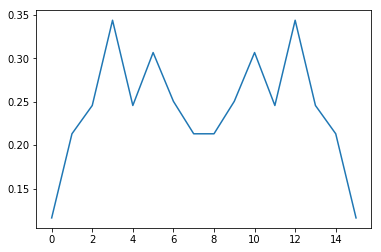

In [66]:
plt.plot(np.abs(ψ.full()))